Activation functions
* ReLU: it transforms values of the dependent variable or output such that for all input values less than 0, the output will be 0 while for input values greater than zero, it will return the correspinding value of the output.
* Tanh (Hyperbolic Tangent): It sqeezes the value between -1 and 1.
* Sigmoid: It transforms the values between 0 and 1, all positive extreme values are turned close to 1 and all negative extreme values are transformed close to 0.

In [1]:
 import tensorflow as tf
 from tensorflow import keras

 import numpy as np
 import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

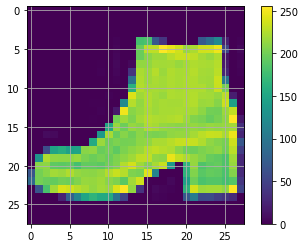

In [12]:
plt.figure()
plt.imshow(train_images[122])
plt.colorbar()
plt.grid()
plt.show()

Data Processing

In [13]:
train_images = train_images / 255.

test_images = test_images / 255.

Building the Model

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation= 'softmax')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5023 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3749 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3124 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2805 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8845
Test accuracy 0.8845000267028809


Making Predictions

Trouser


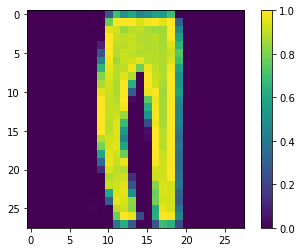

In [18]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Verifying Predictions

In [21]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(predictions)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: "+ label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")


  num = get_number()
  image = test_images[num]
  label = test_labels[num]
  predict(model, image, label)